<a href="https://colab.research.google.com/github/sherbw28/class_deep/blob/main/MNISTExample2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import keras
# #学習用ライブラリ
# from keras.models import Sequential #学習モデル Sequentialモデル
# from keras.layers.core import Dense, Dropout, Activation #ニューロンの各層
# from tensorflow.keras.optimizers import RMSprop
# from keras.callbacks import EarlyStopping, CSVLogger
# #MNISTデータセットを読み込む
# from keras.datasets import mnist


#学習用ライブラリ
from tensorflow import keras
#MNISTデータセットを読み込む
from tensorflow.keras.datasets import mnist
#学習モデル Sequentialモデル
from tensorflow.keras.models import Sequential
#ニューロンの各層
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, CSVLogger


#表示用にpyplotを読み込む
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
#バッチサイズ（元のデータを何件ごとまとめて処理するか）
batch_size = 128
#クラス数（結果をいくつに分類するか）
num_classes = 10
#エポックサイズ（学習の回数：順伝播逆伝播の繰り返し数）
epochs = 20

In [3]:
#MNISTデータ読み込み
#x_**は画像データ（説明変数）、y_**は答え（その画像が数字の何なのか。目的変数）
#**_trainは学習用データ、**_testは検証用データ
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


MNISTデータをいくつか表示

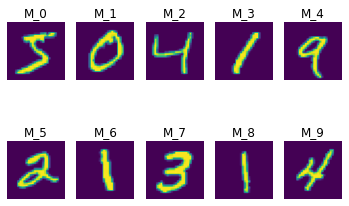

In [4]:
#ループしてx_trainに入ったMNISTの画像データを試しに表示
for i in range(10):
  #pyplotで表示していく
  plt.subplot(2, 5, i + 1) #2行5列で、i+1番目の画像のプロットをセット
  plt.title("M_%d" % i) #「M_0」のような形式でタイトルを表示
  plt.axis("off") #軸線をオフ
  plt.imshow(x_train[i].reshape(28, 28), cmap=None)
#ループ終わり
plt.show()

In [5]:
#28*28ピクセルの画像を一行にすると、784ピクセルになる
#横に784個、0～255までのRGB色数値が並ぶようにする
#x_trainは60,000字（60,000行）分*784列の2次元配列に変換することになる
x_train = x_train.reshape(60000, 784).astype('float32')
#x_testは10,000字（10,000行）分*784列の2次元配列に変換することになる
x_test = x_test.reshape(10000, 784).astype('float32')
#画像ドットの色情報(RGB 0～255)を0～1の小数値の範囲に変換する
x_train /= 255 #x_trainのひとつひとつを、255で割った値の上書き
x_test /= 255
#答えデータをnum_classesの数（10）に分類
y_train = keras.utils.to_categorical(y_train, num_classes) #学習用
y_test = keras.utils.to_categorical(y_test, num_classes) #検証用

In [6]:
#学習xデータ
print(x_train.shape) #60,000行（6万文字レコード）784列
#検証xデータ
print(x_test.shape) #10,000行（1万文字レコード）784列
#学習yデータ
print(y_train.shape) #60,000行（6万文字レコード）、（num_class:0～9の分類）
#検証yデータ
print(y_test.shape) #10,000行（1万文字レコード）、（num_class:0～9の分類）

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


In [7]:
#学習モデルを生成
model = Sequential()

In [8]:

#ニューラル層を作っていく
#784次元のデータが、任意の数だけ入力され、512次元の形で出力される
model.add(Dense(512, input_shape=(784, )))
#活性化関数をrelu関数に指定
model.add(Activation('relu'))
#Dropout（データを間引いて過学習を防ぐ）
model.add(Dropout(0.2)) #20%の結果値を0にリセット

In [9]:
#ニューロンの層の追加
model.add(Dense(512)) #512の次元で出力される
#活性化関数をrelu関数に指定
model.add(Activation('relu'))
#Dropout（データを間引いて過学習を防ぐ）
model.add(Dropout(0.2))


In [10]:
#ニューロンの3層目（出力層）の追加
model.add(Dense(num_classes)) #最後は10個（num_classes）に分類
#最後だけ活性化関数はsoftmaxを指定する
#（複数の出力値の合計が「1.0」（ = 100%）になるような値を返してくれるから）
model.add(Activation('softmax'))

In [11]:
#学習モデルのサマリ
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5

In [12]:
model.compile(loss = 'categorical_crossentropy', #損失の基準（交換エントロピー誤差）
              optimizer = RMSprop(),
              metrics = ['accuracy']) #accuracy精度

In [13]:
#コールバック処理の準備
#学習が進んで損失がそれ以上下がらなければ早期終了する
#patience=2は、2回学習分だけ、終了まで様子を見る
es = EarlyStopping(monitor = 'val_loss', patience=2)
#ログ出力
csv_logger = CSVLogger('training.log')

#学習モデルに学習させる
#（正解データにフィットするように重みを調整する）
hist = model.fit(
    x_train, #学習用画像データ：問題
    y_train, #学習用画像データ；正解
    batch_size,  #バッチサイズ（batch_size = 20）
    epochs = epochs, #エポック数（学習回数）（epochs = 20）
    verbose = 1, #進行状況を表示
    validation_split = 0.1, #validationデータ（検証データ、チェックデータ）の割合（10%：この分は学習に使わず、検証チェックに使う）
    callbacks = [es, csv_logger] #コールバック処理
    )

Epoch 1/20
422/422 [==============================] - 10s 11ms/step - loss: 0.2606 - accuracy: 0.9196 - val_loss: 0.0921 - val_accuracy: 0.9707
Epoch 2/20
422/422 [==============================] - 2s 4ms/step - loss: 0.1091 - accuracy: 0.9668 - val_loss: 0.0748 - val_accuracy: 0.9795
Epoch 3/20
422/422 [==============================] - 2s 4ms/step - loss: 0.0772 - accuracy: 0.9765 - val_loss: 0.0813 - val_accuracy: 0.9780
Epoch 4/20
422/422 [==============================] - 2s 4ms/step - loss: 0.0621 - accuracy: 0.9815 - val_loss: 0.0704 - val_accuracy: 0.9838
Epoch 5/20
422/422 [==============================] - 2s 4ms/step - loss: 0.0521 - accuracy: 0.9840 - val_loss: 0.0713 - val_accuracy: 0.9823
Epoch 6/20
422/422 [==============================] - 2s 4ms/step - loss: 0.0434 - accuracy: 0.9871 - val_loss: 0.0784 - val_accuracy: 0.9820


In [14]:
#evaluateメソッドで検証する
score = model.evaluate(x_test, y_test, verbose = 0) #検証結果を変数に代入
print('test loss:', score[0]) #損失（誤り率）を表示
print('test acc:', score[1]) #精度（正解率）を表示

test loss: 0.0825299397110939
test acc: 0.9801999926567078


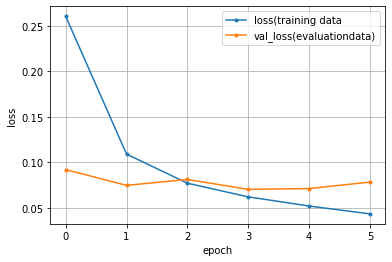

In [15]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = len(loss)
plt.plot(range(epochs), loss, marker = '.', label = 'loss(training data')
plt.plot(range(epochs), val_loss, marker = '.', label = 'val_loss(evaluationdata)')
plt.legend(loc = 'best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
#最後に表示
plt.show()